In [1]:
# packages import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import scipy.optimize as sco

from src.efficient_frontier import EfficientFontier

# tickers 
tickers = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']

start_date = '2011-01-01'
end_date = '2024-03-02'
actions = False

# Data download
efficient_frontier = EfficientFontier(
    tickers = tickers,
    start_date = start_date,
    end_date = end_date,
    actions = actions
)

In [2]:
drop_col_list = ['Open','High','Low','Volume']
min_return = 0.09
max_return = 0.20
sample_num = 50

target_returns, target_volatilities = efficient_frontier.optimize_portpolio_about_returns(
    drop_col_list = drop_col_list,
    min_return = min_return,
    max_return = max_return,
    sample_num = sample_num
)

[*********************100%%**********************]  9 of 9 completed


In [3]:
resampled_target_returns, resampled_target_volatilities = efficient_frontier.optimize_portpolio_about_returns(
    drop_col_list = drop_col_list,
    min_return = min_return,
    max_return = max_return,
    sample_num = sample_num
)

target_returns, target_volatilities = efficient_frontier.optimize_portpolio_about_returns(
    drop_col_list = drop_col_list,
    min_return = min_return,
    max_return = max_return,
    sample_num = sample_num,
    resampling = False
)

[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  9 of 9 completed


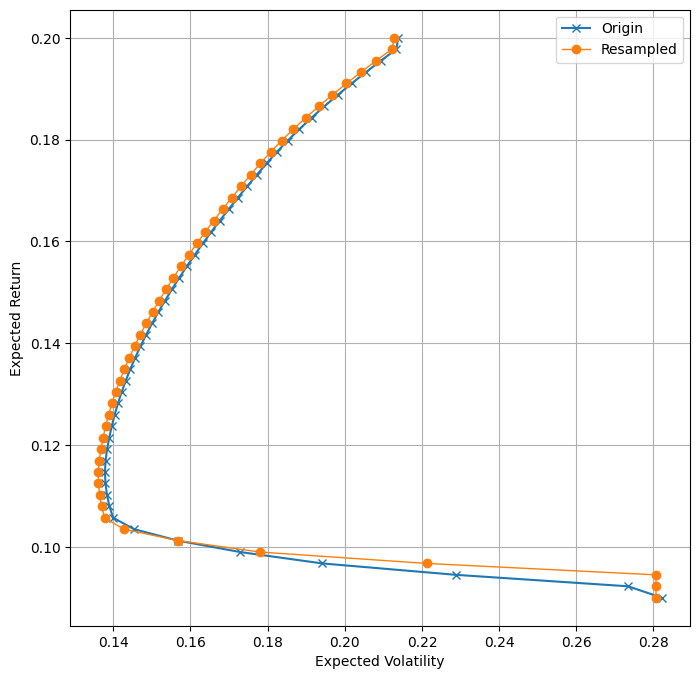

In [6]:
plt.figure(figsize=(8, 8))
plt.plot(target_volatilities, target_returns, marker='x', label="Origin")
plt.plot(resampled_target_volatilities, resampled_target_returns, lw=1.0, marker='o', label="Resampled")
plt.grid(True)

plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.legend()